In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [290]:
# Load the dataset
dataset = pd.read_csv('supermart_grocery_sale.csv')
# Display the first few rows of the dataset
print(dataset.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [291]:
# Check for missing values
print(dataset.isnull().sum())
# Drop any rows with missing values
dataset.dropna(inplace=True)
# Check for duplicates
dataset.drop_duplicates(inplace=True)

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [292]:
# Convert 'Order Date' to datetime format
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], format='mixed')
# Extract day, month, and year from 'Order Date'
dataset['Order Day'] = dataset['Order Date'].dt.day
dataset['Order Month'] = dataset['Order Date'].dt.month
dataset['Order Year'] = dataset['Order Date'].dt.year

In [293]:
# Initialize the label encoder
le = LabelEncoder()
# Encode categorical variables
dataset['Category'] = le.fit_transform(dataset['Category'])
dataset['Sub Category'] = le.fit_transform(dataset['Sub Category'])
dataset['City'] = le.fit_transform(dataset['City'])
dataset['Region'] = le.fit_transform(dataset['Region'])
dataset['State'] = le.fit_transform(dataset['State'])
dataset['Month'] = dataset['Order Date'].dt.month
# Display the first few rows after encoding
print(dataset.head())

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  Month  
0   1254      0.12  401.28      0          8           11        2017     11  
1    749      0.18  149.80      0          8           11        2017     11  
2   2360      0.21  165.20      0         12            6        2017      6  
3    896      0.25   89.60      0         11           10        2016     10  
4   2355      0.26  918.45      0         11           10        2016     10  


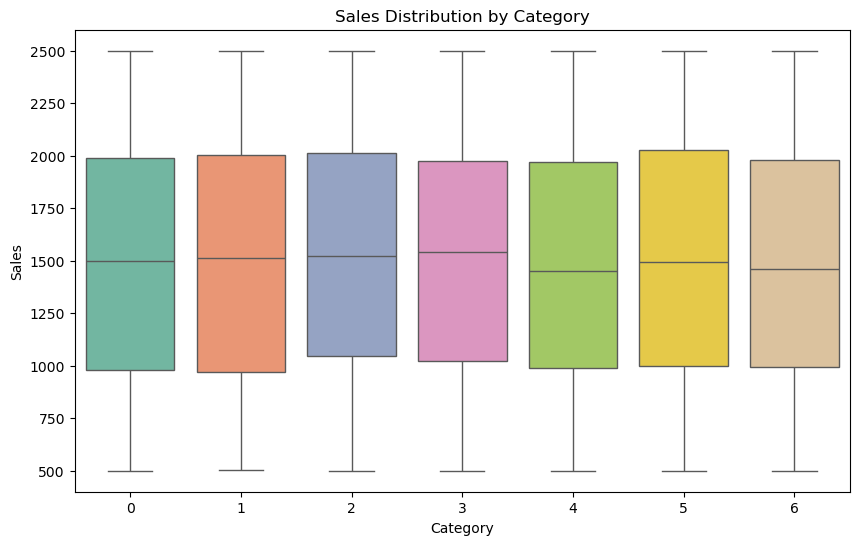

In [294]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Sales', data=dataset, hue='Category', palette='Set2', legend=False)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

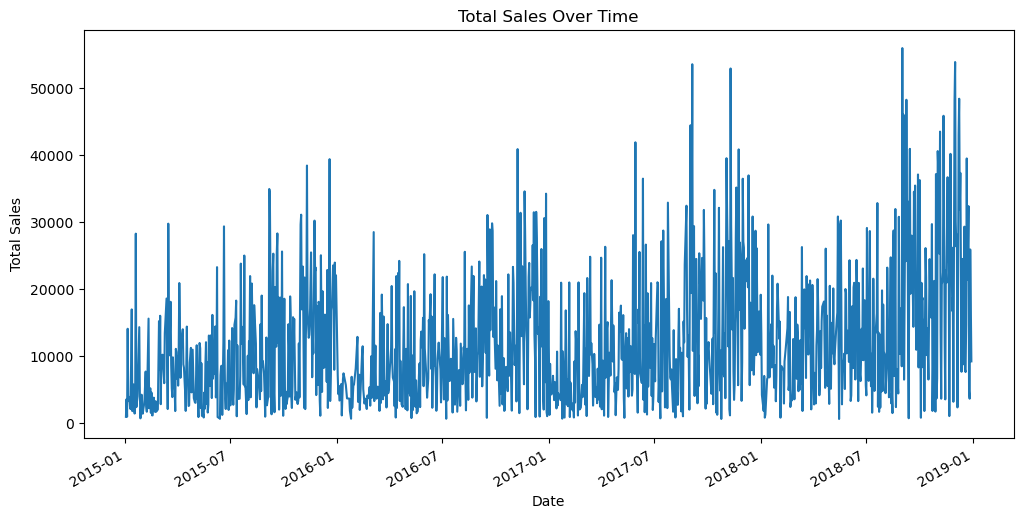

In [295]:
plt.figure(figsize=(12, 6))
dataset.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

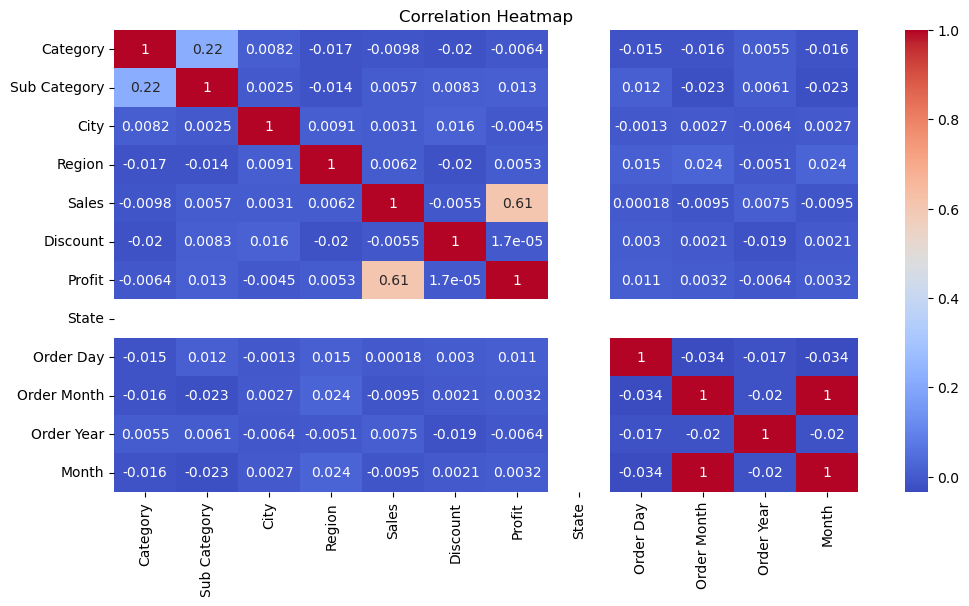

In [296]:
corr_matrix = dataset.corr(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [297]:
# Select features and target variable
features = dataset.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales', 'Month'])
target = dataset['Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [298]:
# Initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [299]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212954.08313440107
R-squared: 0.3543257711757313


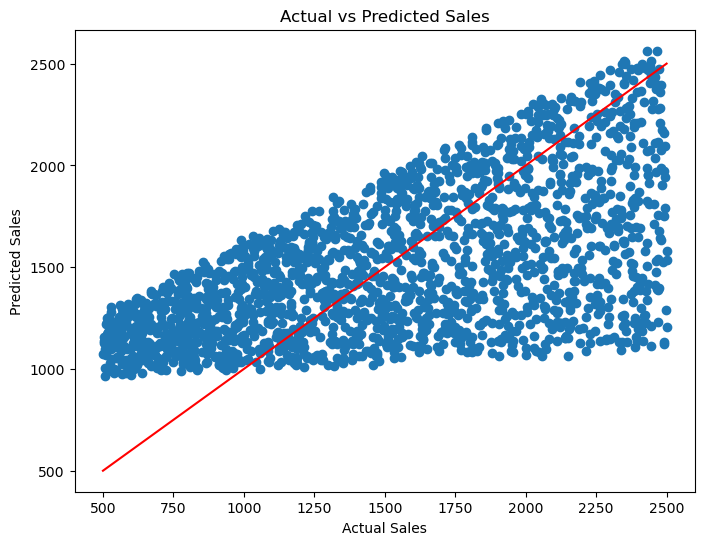

In [300]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

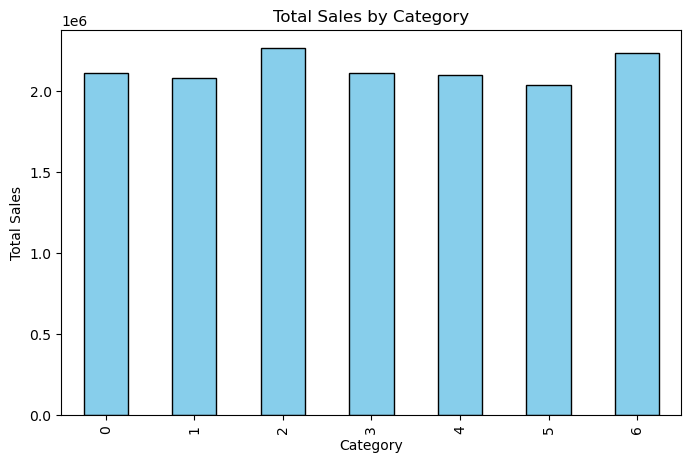

In [301]:
Sales_category = dataset.groupby("Category")["Sales"].sum()

# Plot sales by category
Sales_category.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

In [302]:
dataset['month_no'] = dataset['Order Date'].dt.month
dataset['Month'] = pd.to_datetime(dataset['Order Date']).dt.strftime('%B')
dataset['year'] = dataset['Order Date'].dt.year
dataset.head()



,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year,Month,month_no,year
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8,11,2017,November,11,2017
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,8,11,2017,November,11,2017
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12,6,2017,June,6,2017
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,11,10,2016,October,10,2016
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11,10,2016,October,10,2016


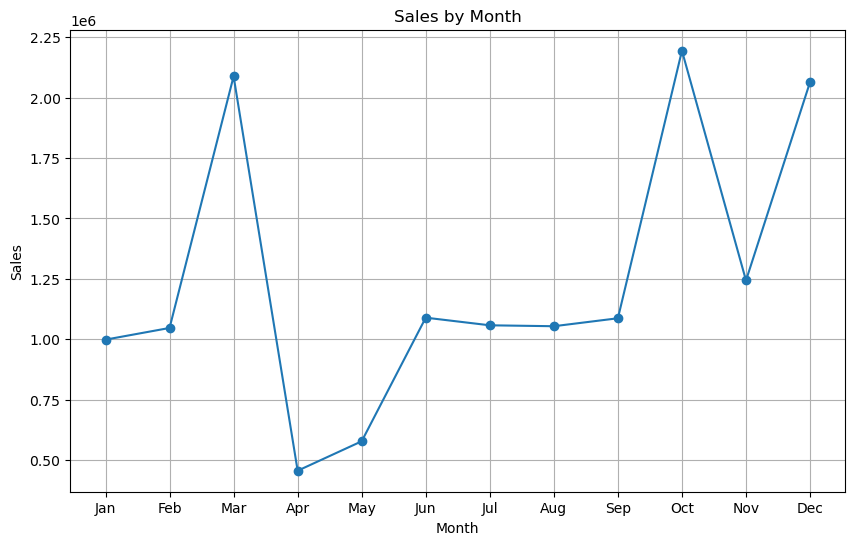

In [303]:
monthly_sales = dataset.groupby('Month')['Sales'].sum().reset_index()
# Sort the data by month
monthly_sales_sorted = monthly_sales.sort_values(by='Month')
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Month'],
monthly_sales_sorted['Sales'], marker='o')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Month'], ['Jan', 'Feb', 'Mar',
'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

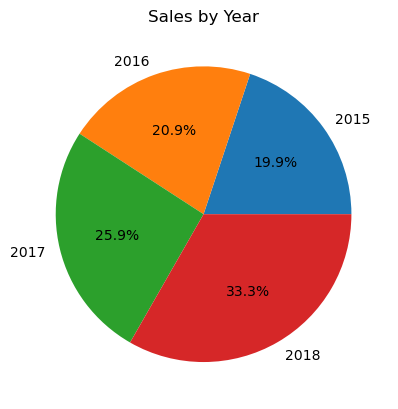

In [304]:
#we want to find the Yearly Sales
# we group by Year and get the total number of sales for each year

Yearly_Sales=dataset.groupby("year")["Sales"].sum()
# we create a pie chart with the sales by year
plt.pie(Yearly_Sales, labels=Yearly_Sales.index,
autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()
#Monthly_Sales.

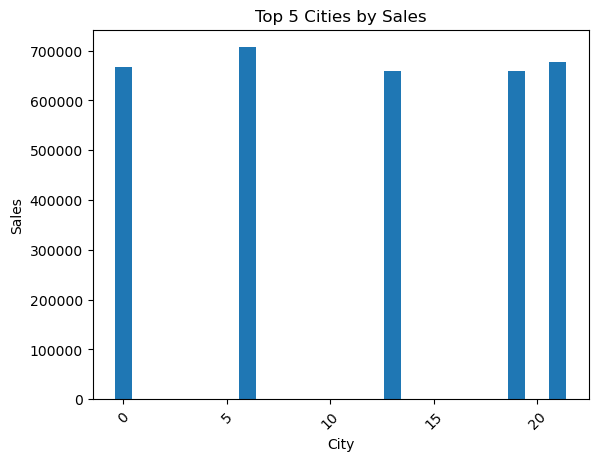

In [305]:
# Step 1: Extract relevant columns
city_sales = dataset[['City', 'Sales']]
# Step 2: Calculate total sales per city
total_sales = city_sales.groupby('City').sum()
# Step 3: Sort the cities by sales
sorted_cities = total_sales.sort_values(by='Sales',
ascending=False)
# Step 4: Select the top 5 cities
top_cities = sorted_cities.head(5)
# Step 5: Plot the bar chart
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()